In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
#import Heron Island data
bleaching_HI = pd.read_csv('https://raw.githubusercontent.com/abisawtell/Coral_Bleaching/main/BleachingThresholds_HeronIsland.csv')


In [3]:
#Rename to SUMMER-BEGINNING to YEAR
bleaching_HI = bleaching_HI.rename(columns={'SUMMER-BEGINNING': 'YEAR'})

#Create a threshold df
threshold_HI = bleaching_HI[['TEMPERATURE', 'THRESHOLD-DAYS']]
threshold_HI.rename(columns={'THRESHOLD-DAYS': 'ACTUAL-DAYS'}, inplace=True)
threshold_HI['YEAR'] = 'Heron Island Bleaching Threshold'
threshold_HI

#Rename variables in year
bleaching_HI = bleaching_HI.replace('2017-11-01T00:00:00', 'Number of Days for Summer 2017')
bleaching_HI = bleaching_HI.replace('2018-11-01T00:00:00', 'Number of Days for Summer 2018')
bleaching_HI = bleaching_HI.replace('2019-11-01T00:00:00', 'Number of Days for Summer 2019')

#Drop columns
bleaching_HI = bleaching_HI.drop(['THRESHOLD-DAYS'], axis=1)

#Append threshold days to the bleaching dataframe
bleaching_HI = bleaching_HI.append(threshold_HI)

bleaching_HI

,ACTUAL-DAYS,TEMPERATURE,YEAR
0,10.0,27.5,Number of Days for Summer 2017
1,8.0,27.6,Number of Days for Summer 2017
2,3.0,27.7,Number of Days for Summer 2017
3,1.0,27.8,Number of Days for Summer 2017
4,0.0,27.9,Number of Days for Summer 2017
5,0.0,28.0,Number of Days for Summer 2017
6,0.0,28.1,Number of Days for Summer 2017
7,0.0,28.2,Number of Days for Summer 2017
8,0.0,28.3,Number of Days for Summer 2017
9,0.0,28.4,Number of Days for Summer 2017


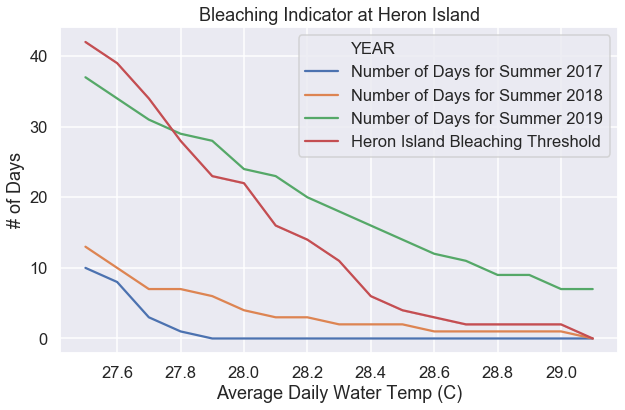

In [20]:
#plot bleaching threshold 
plt.figure(figsize=(10,6))
bt_HI = sns.lineplot(data=bleaching_HI, x='TEMPERATURE', y="ACTUAL-DAYS", hue="YEAR")

#Rename axes
bt_HI.set_title('Bleaching Indicator at Heron Island')
bt_HI.set_ylabel('# of Days')
bt_HI.set_xlabel('Average Daily Water Temp (C)')

#Save plot
plt.savefig('Plots/HeronIsland_BleachingThreshold.png')

In [5]:
#import Lizard Island data
bleaching_LI = pd.read_csv('https://raw.githubusercontent.com/abisawtell/Coral_Bleaching/main/BleachingThresholds_LizardIsland.csv')


In [6]:
#Rename to SUMMER-BEGINNING to YEAR
bleaching_LI = bleaching_LI.rename(columns={'SUMMER-BEGINNING': 'YEAR'})

#Create a threshold df
threshold_LI = bleaching_LI[['TEMPERATURE', 'THRESHOLD-DAYS']]
threshold_LI.rename(columns={'THRESHOLD-DAYS': 'ACTUAL-DAYS'}, inplace=True)
threshold_LI['YEAR'] = 'Lizard Island Bleaching Threshold'
threshold_LI

#Rename variables in year
bleaching_LI = bleaching_LI.replace('2017-11-01T00:00:00', 'Number of Days for Summer 2017')
bleaching_LI = bleaching_LI.replace('2018-11-01T00:00:00', 'Number of Days for Summer 2018')
bleaching_LI = bleaching_LI.replace('2019-11-01T00:00:00', 'Number of Days for Summer 2019')

#Drop columns
bleaching_LI = bleaching_LI.drop(['THRESHOLD-DAYS'], axis=1)

#Append threshold days to the bleaching dataframe
bleaching_LI = bleaching_LI.append(threshold_LI)
bleaching_LI


,ACTUAL-DAYS,TEMPERATURE,YEAR
0,0.0,29.7,Number of Days for Summer 2017
1,0.0,29.8,Number of Days for Summer 2017
2,0.0,29.9,Number of Days for Summer 2017
3,0.0,30.0,Number of Days for Summer 2017
4,0.0,30.1,Number of Days for Summer 2017
5,0.0,30.2,Number of Days for Summer 2017
6,0.0,30.3,Number of Days for Summer 2017
7,0.0,30.4,Number of Days for Summer 2017
8,5.0,29.7,Number of Days for Summer 2018
9,4.0,29.8,Number of Days for Summer 2018


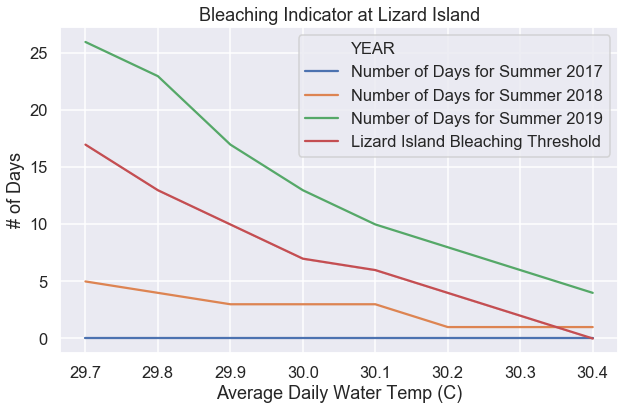

In [7]:
#plot bleaching threshold 
plt.figure(figsize=(10,6))
bt_LI = sns.lineplot(data=bleaching_LI, x='TEMPERATURE', y="ACTUAL-DAYS", hue="YEAR")

#Rename axes
bt_LI.set_title('Bleaching Indicator at Lizard Island')
bt_LI.set_ylabel('# of Days')
bt_LI.set_xlabel('Average Daily Water Temp (C)')

#Save plot
plt.savefig('Plots/LizardIsland_BleachingThreshold.png')

In [8]:
#import Myrmidon Reef data
bleaching_MR = pd.read_csv('https://raw.githubusercontent.com/abisawtell/Coral_Bleaching/main/BleachingThresholds_MyrmidonReef.csv')



In [9]:
#Rename to SUMMER-BEGINNING to YEAR
bleaching_MR = bleaching_MR.rename(columns={'SUMMER-BEGINNING': 'YEAR'})

#Create a threshold df
threshold_MR = bleaching_MR[['TEMPERATURE', 'THRESHOLD-DAYS']]
threshold_MR.rename(columns={'THRESHOLD-DAYS': 'ACTUAL-DAYS'}, inplace=True)
threshold_MR['YEAR'] = 'Myrmidon Reef Bleaching Threshold'
threshold_MR

#Rename variables in year
bleaching_MR = bleaching_MR.replace('2017-11-01T00:00:00', 'Number of Days for Summer 2017')
bleaching_MR = bleaching_MR.replace('2018-11-01T00:00:00', 'Number of Days for Summer 2018')
bleaching_MR = bleaching_MR.replace('2019-11-01T00:00:00', 'Number of Days for Summer 2019')

#Drop columns
bleaching_MR = bleaching_MR.drop(['THRESHOLD-DAYS'], axis=1)

#Append threshold days to the bleaching dataframe
bleaching_MR = bleaching_MR.append(threshold_MR)
bleaching_MR


,ACTUAL-DAYS,TEMPERATURE,YEAR
0,54.0,28.7,Number of Days for Summer 2017
1,49.0,28.8,Number of Days for Summer 2017
2,32.0,28.9,Number of Days for Summer 2017
3,25.0,29.0,Number of Days for Summer 2017
4,12.0,29.1,Number of Days for Summer 2017
5,6.0,29.2,Number of Days for Summer 2017
6,2.0,29.3,Number of Days for Summer 2017
7,0.0,29.4,Number of Days for Summer 2017
8,0.0,29.5,Number of Days for Summer 2017
9,0.0,29.6,Number of Days for Summer 2017


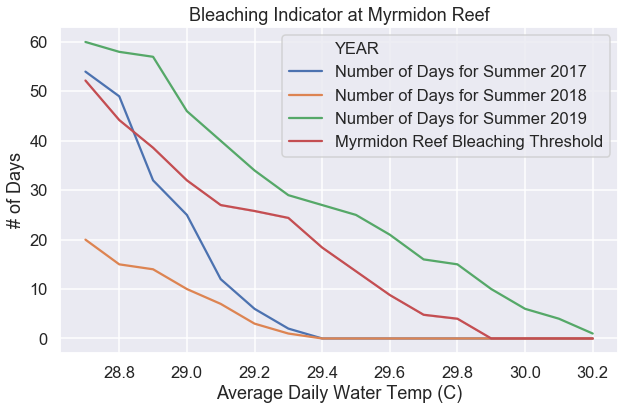

In [10]:
#plot bleaching threshold 
plt.figure(figsize=(10,6))
bt_MR = sns.lineplot(data=bleaching_MR, x='TEMPERATURE', y="ACTUAL-DAYS", hue="YEAR")

#Rename axes
bt_MR.set_title('Bleaching Indicator at Myrmidon Reef')
bt_MR.set_ylabel('# of Days')
bt_MR.set_xlabel('Average Daily Water Temp (C)')

#Save plot
plt.savefig('Plots/MyrmidonReef_BleachingThreshold.png')

In [11]:
watertemp_HI = pd.read_csv('https://raw.githubusercontent.com/abisawtell/Coral_Bleaching/main/WaterTemp_HeronIsland.csv')


In [12]:
#Create a long term df and append
LongTerm_HI = watertemp_HI[['DATE', 'LONG_TERM_AVERAGE',]]
LongTerm_HI.rename(columns={'LONG_TERM_AVERAGE': 'AVERAGE'}, inplace=True)
LongTerm_HI['YEAR'] = 'Long Term Average'
LongTerm_HI

#Create 2017, 2018, 2019 df
temp17_HI = watertemp_HI[['DATE', 'wtemp_LEVEL1_summer_17_18',]]
temp17_HI.rename(columns={'wtemp_LEVEL1_summer_17_18': 'AVERAGE'}, inplace=True)
temp17_HI['YEAR'] = '2017'
temp17_HI


temp18_HI = watertemp_HI[['DATE', 'wtemp_LEVEL1_summer_18_19',]]
temp18_HI.rename(columns={'wtemp_LEVEL1_summer_18_19': 'AVERAGE'}, inplace=True)
temp18_HI['YEAR'] = '2018'
temp18_HI

temp19_HI = watertemp_HI[['DATE', 'wtemp_LEVEL1_summer_19_20',]]
temp19_HI.rename(columns={'wtemp_LEVEL1_summer_19_20': 'AVERAGE'}, inplace=True)
temp19_HI['YEAR'] = '2019'
temp19_HI


#Add these all to water temp df
watertemp_HI = LongTerm_HI.append(temp17_HI)
watertemp_HI = watertemp_HI.append(temp18_HI)
watertemp_HI = watertemp_HI.append(temp19_HI)




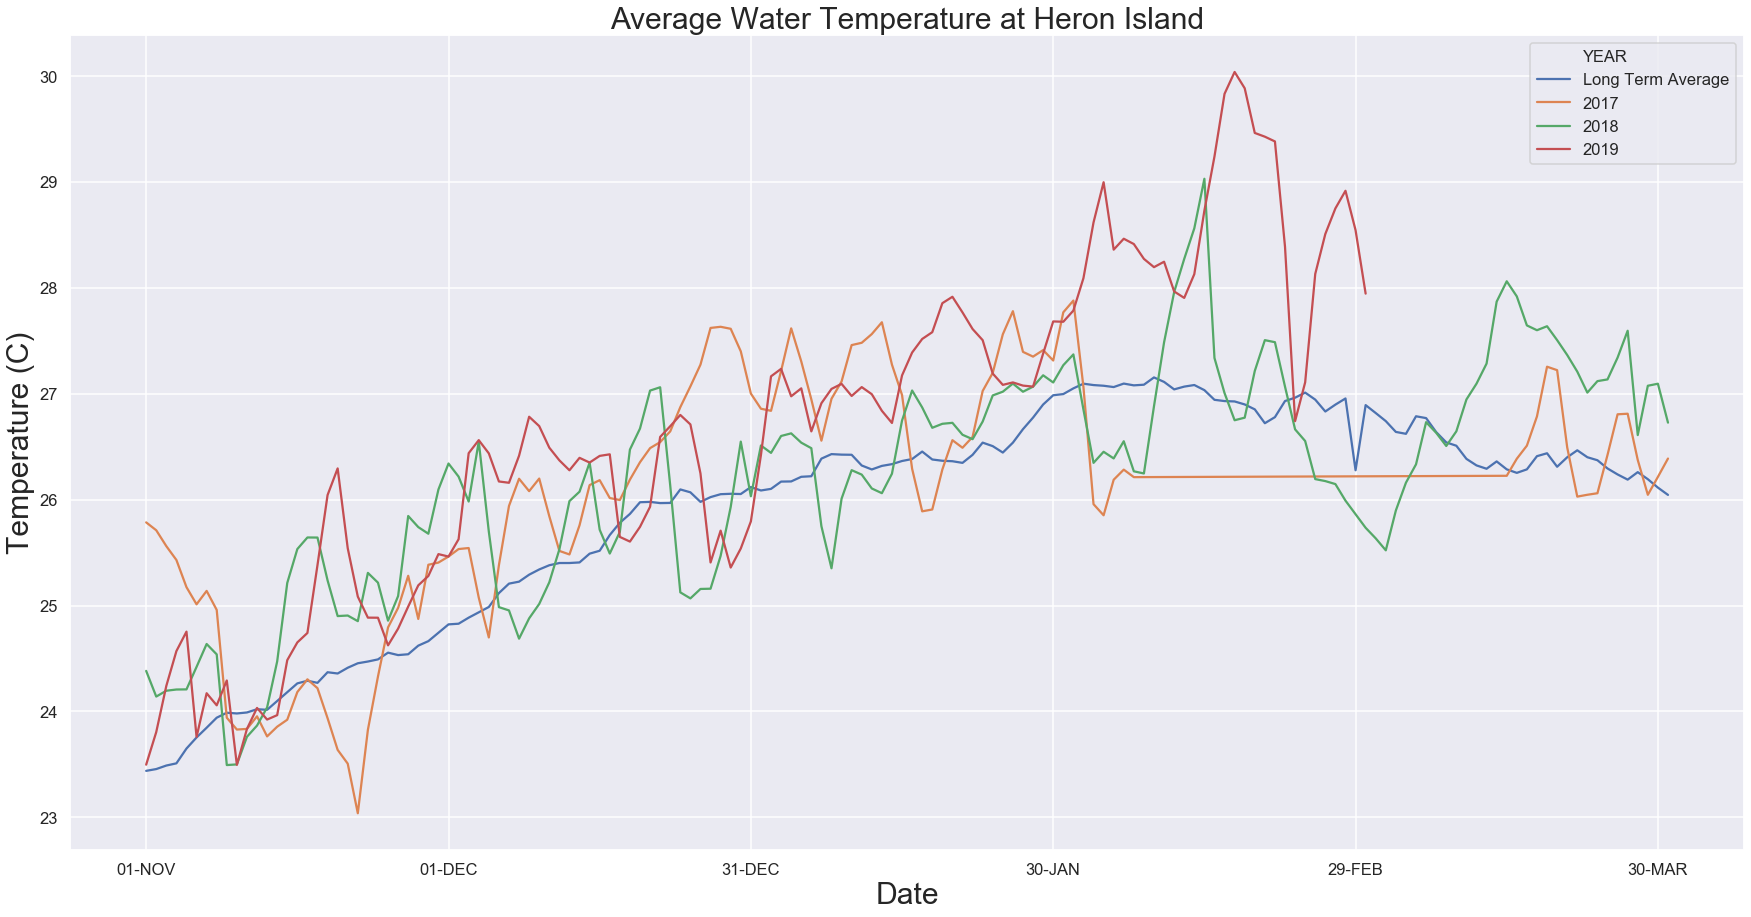

In [13]:
#Plot Heron Island Water Temp
plt.figure(figsize=(30,15))
temp_HI = sns.lineplot(data=watertemp_HI, x='DATE', y="AVERAGE", hue="YEAR", sort=False)
temp_HI.xaxis.set_major_locator(ticker.MultipleLocator(30))

#Rename axes
temp_HI.set_title('Average Water Temperature at Heron Island', size=30)
temp_HI.set_ylabel('Temperature (C)', size=30)
temp_HI.set_xlabel('Date', size=30)

#Save plot
plt.savefig('Plots/HeronIsland_WaterTemperature.png')


In [14]:
watertemp_LI = pd.read_csv('https://raw.githubusercontent.com/abisawtell/Coral_Bleaching/main/WaterTemp_LizardIsland.csv')
watertemp_LI

,DATE,TOTAL_YEARS,LONG_TERM_AVERAGE,wtemp_LEVEL1_summer_17_18,wtemp_LEVEL1_summer_18_19,wtemp_LEVEL1_summer_19_20
0,1-Nov,10,26.601540,27.8838,26.4814,25.5290
1,2-Nov,10,26.653809,27.5735,26.4147,25.6167
2,3-Nov,10,26.743448,27.4491,26.4306,25.5916
3,4-Nov,10,26.780950,27.2011,26.6156,25.6777
4,5-Nov,10,26.837421,26.9966,26.8284,25.6697
5,6-Nov,10,26.901215,26.8993,26.9530,25.6417
6,7-Nov,10,26.968102,27.0347,27.0665,25.6415
7,8-Nov,10,27.063592,27.2979,27.3101,25.7332
8,9-Nov,10,27.126790,27.1987,27.2655,26.2854
9,10-Nov,10,27.139451,26.8716,27.1292,26.6482


In [15]:
#Create a long term df and append
LongTerm_LI = watertemp_LI[['DATE', 'LONG_TERM_AVERAGE',]]
LongTerm_LI.rename(columns={'LONG_TERM_AVERAGE': 'AVERAGE'}, inplace=True)
LongTerm_LI['YEAR'] = 'Long Term Average'
LongTerm_LI

#Create 2017, 2018, 2019 df
temp17_LI = watertemp_LI[['DATE', 'wtemp_LEVEL1_summer_17_18',]]
temp17_LI.rename(columns={'wtemp_LEVEL1_summer_17_18': 'AVERAGE'}, inplace=True)
temp17_LI['YEAR'] = '2017'
temp17_LI


temp18_LI = watertemp_LI[['DATE', 'wtemp_LEVEL1_summer_18_19',]]
temp18_LI.rename(columns={'wtemp_LEVEL1_summer_18_19': 'AVERAGE'}, inplace=True)
temp18_LI['YEAR'] = '2018'
temp18_LI

temp19_LI = watertemp_LI[['DATE', 'wtemp_LEVEL1_summer_19_20',]]
temp19_LI.rename(columns={'wtemp_LEVEL1_summer_19_20': 'AVERAGE'}, inplace=True)
temp19_LI['YEAR'] = '2019'
temp19_LI


#Add these all to water temp df
watertemp_LI = LongTerm_LI.append(temp17_LI)
watertemp_LI = watertemp_LI.append(temp18_LI)
watertemp_LI = watertemp_LI.append(temp19_LI)


watertemp_LI

,DATE,AVERAGE,YEAR
0,1-Nov,26.601540,Long Term Average
1,2-Nov,26.653809,Long Term Average
2,3-Nov,26.743448,Long Term Average
3,4-Nov,26.780950,Long Term Average
4,5-Nov,26.837421,Long Term Average
5,6-Nov,26.901215,Long Term Average
6,7-Nov,26.968102,Long Term Average
7,8-Nov,27.063592,Long Term Average
8,9-Nov,27.126790,Long Term Average
9,10-Nov,27.139451,Long Term Average


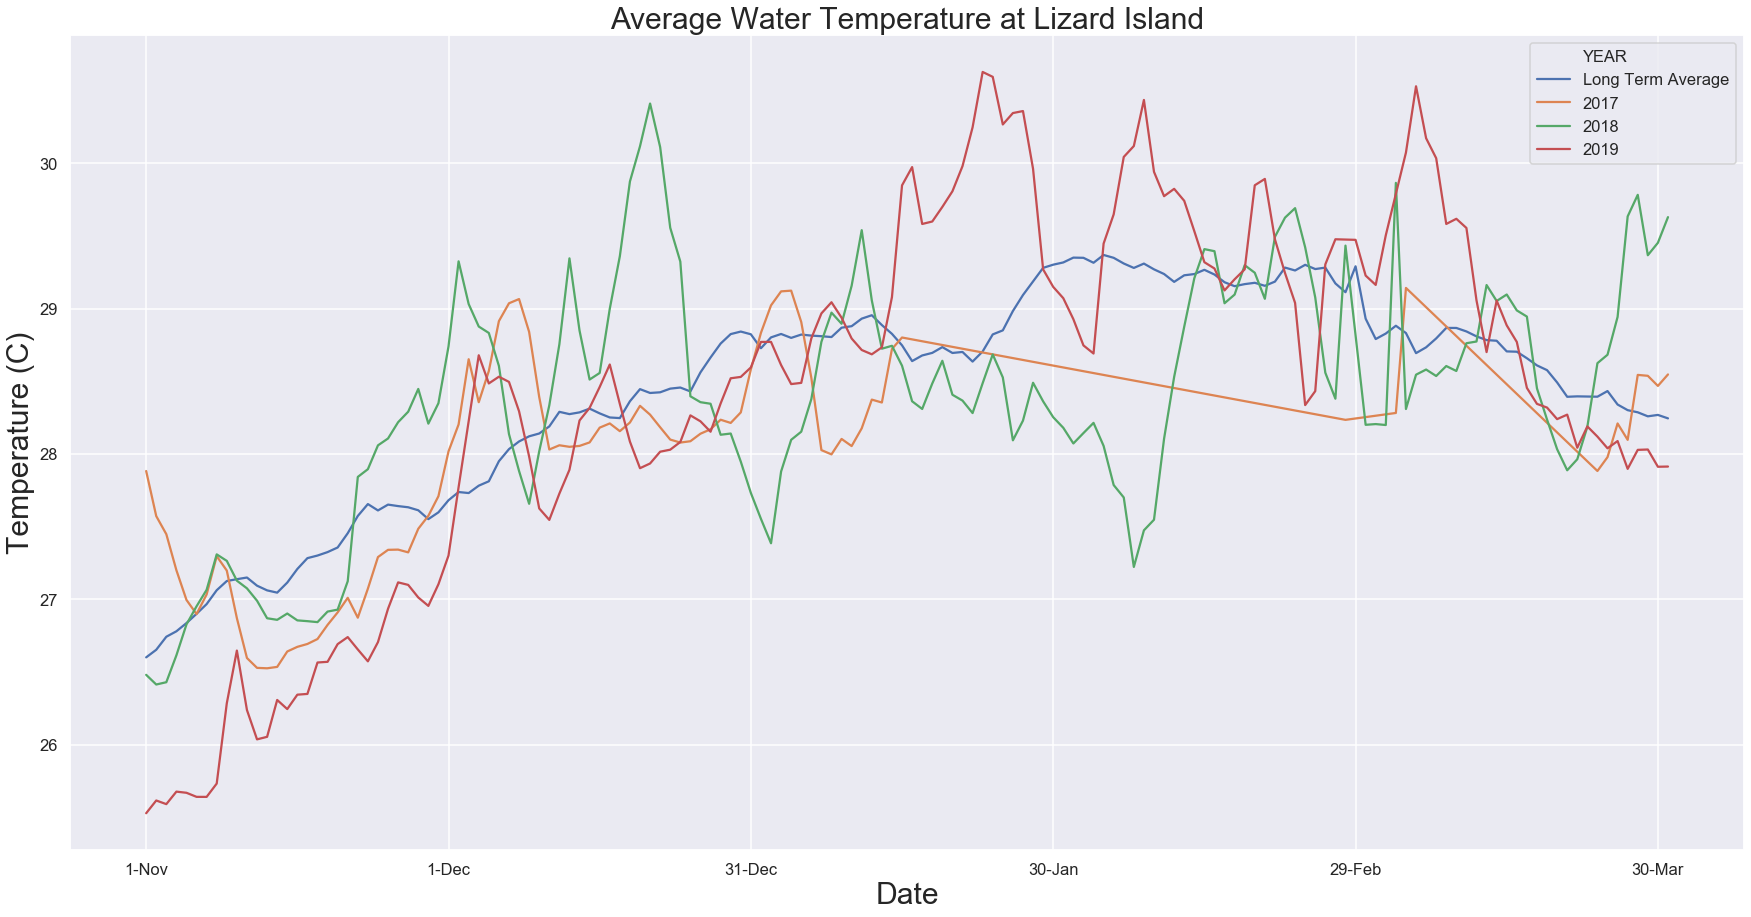

In [16]:
#Plot Lizard Island Water Temp
plt.figure(figsize=(30,15))
temp_LI = sns.lineplot(data=watertemp_LI, x='DATE', y="AVERAGE", hue="YEAR", sort=False)
temp_LI.xaxis.set_major_locator(ticker.MultipleLocator(30))

#Rename axes
temp_LI.set_title('Average Water Temperature at Lizard Island', size=30)
temp_LI.set_ylabel('Temperature (C)', size=30)
temp_LI.set_xlabel('Date', size=30)

#Save plot
plt.savefig('Plots/LizardIsland_WaterTemperature.png')

In [17]:
watertemp_MR = pd.read_csv('https://raw.githubusercontent.com/abisawtell/Coral_Bleaching/main/WaterTemp_MyrmidonReef.csv')

In [18]:
#Create a long term df and append
LongTerm_MR = watertemp_MR[['DATE', 'LONG_TERM_AVERAGE',]]
LongTerm_MR.rename(columns={'LONG_TERM_AVERAGE': 'AVERAGE'}, inplace=True)
LongTerm_MR['YEAR'] = 'Long Term Average'
LongTerm_MR

#Create 2017, 2018, 2019 df
temp17_MR = watertemp_MR[['DATE', 'wtemp_LEVEL1_summer_17_18',]]
temp17_MR.rename(columns={'wtemp_LEVEL1_summer_17_18': 'AVERAGE'}, inplace=True)
temp17_MR['YEAR'] = '2017'
temp17_MR


temp18_MR = watertemp_MR[['DATE', 'wtemp_LEVEL1_summer_18_19',]]
temp18_MR.rename(columns={'wtemp_LEVEL1_summer_18_19': 'AVERAGE'}, inplace=True)
temp18_MR['YEAR'] = '2018'
temp18_MR

temp19_MR = watertemp_MR[['DATE', 'wtemp_LEVEL1_summer_19_20',]]
temp19_MR.rename(columns={'wtemp_LEVEL1_summer_19_20': 'AVERAGE'}, inplace=True)
temp19_MR['YEAR'] = '2019'
temp19_MR


#Add these all to water temp df
watertemp_MR = LongTerm_MR.append(temp17_MR)
watertemp_MR = watertemp_MR.append(temp18_MR)
watertemp_MR = watertemp_MR.append(temp19_MR)




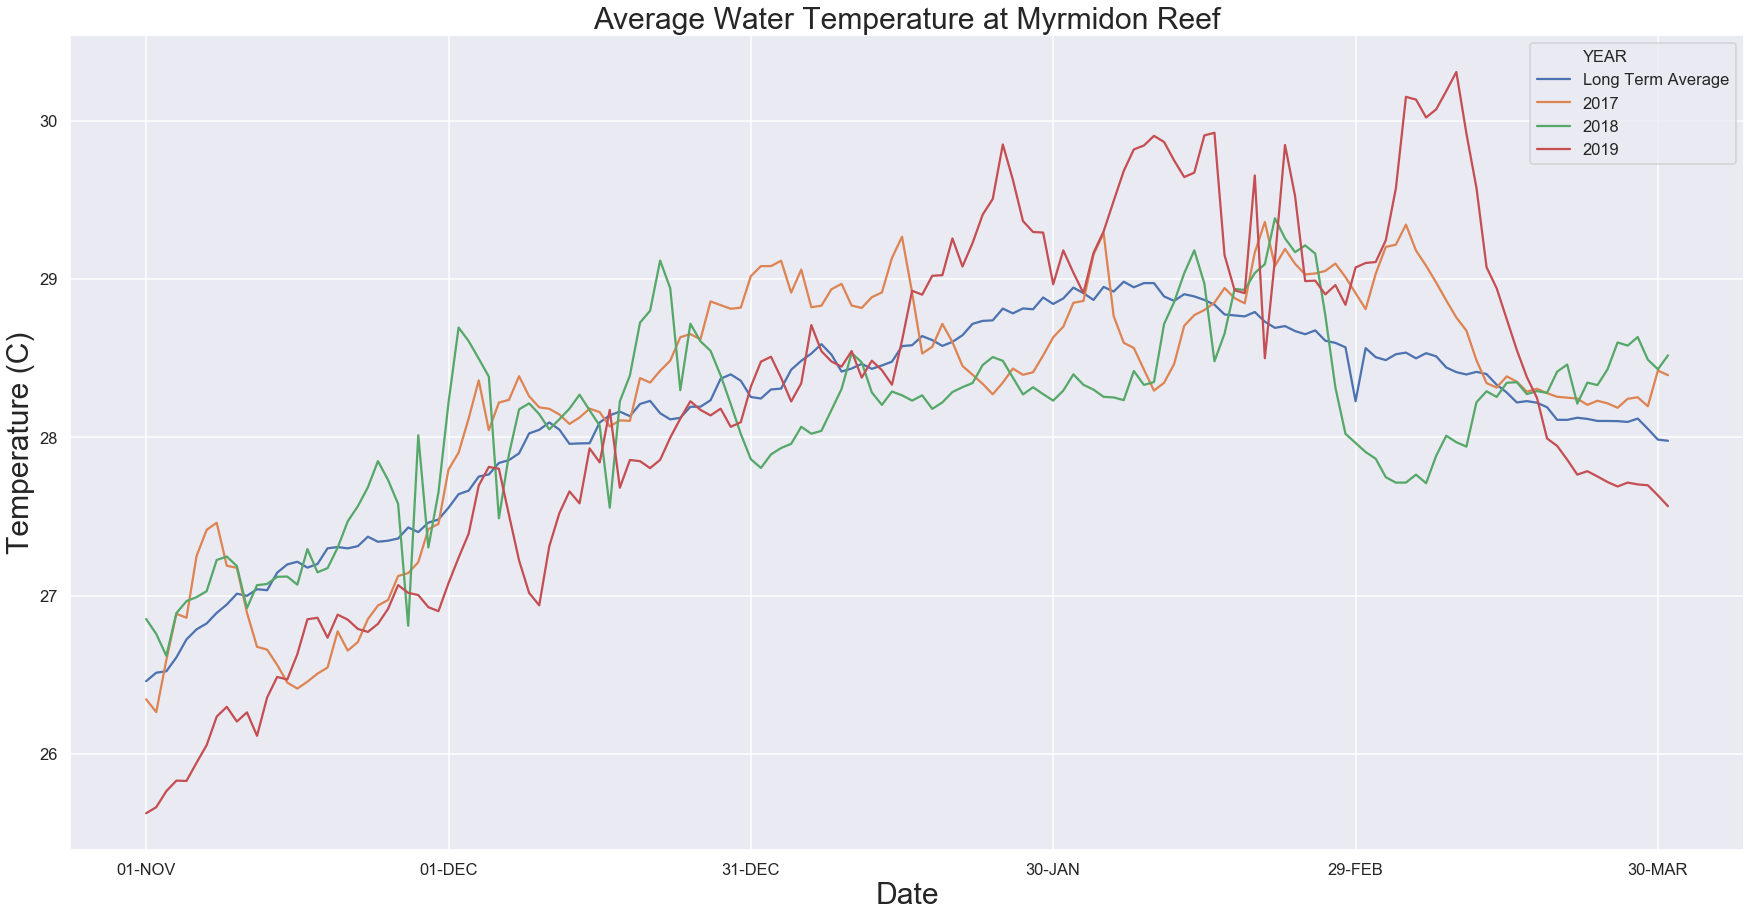

In [19]:
#Plot Myrmidon Reef Water Temp
plt.figure(figsize=(30,15))
temp_MR = sns.lineplot(data=watertemp_MR, x='DATE', y="AVERAGE", hue="YEAR", sort=False)
temp_MR.xaxis.set_major_locator(ticker.MultipleLocator(30))

#Rename axes
temp_MR.set_title('Average Water Temperature at Myrmidon Reef', size=30)
temp_MR.set_ylabel('Temperature (C)', size=30)
temp_MR.set_xlabel('Date', size=30)

#Save plot
plt.savefig('Plots/MyrmidonReef_WaterTemperature.png')